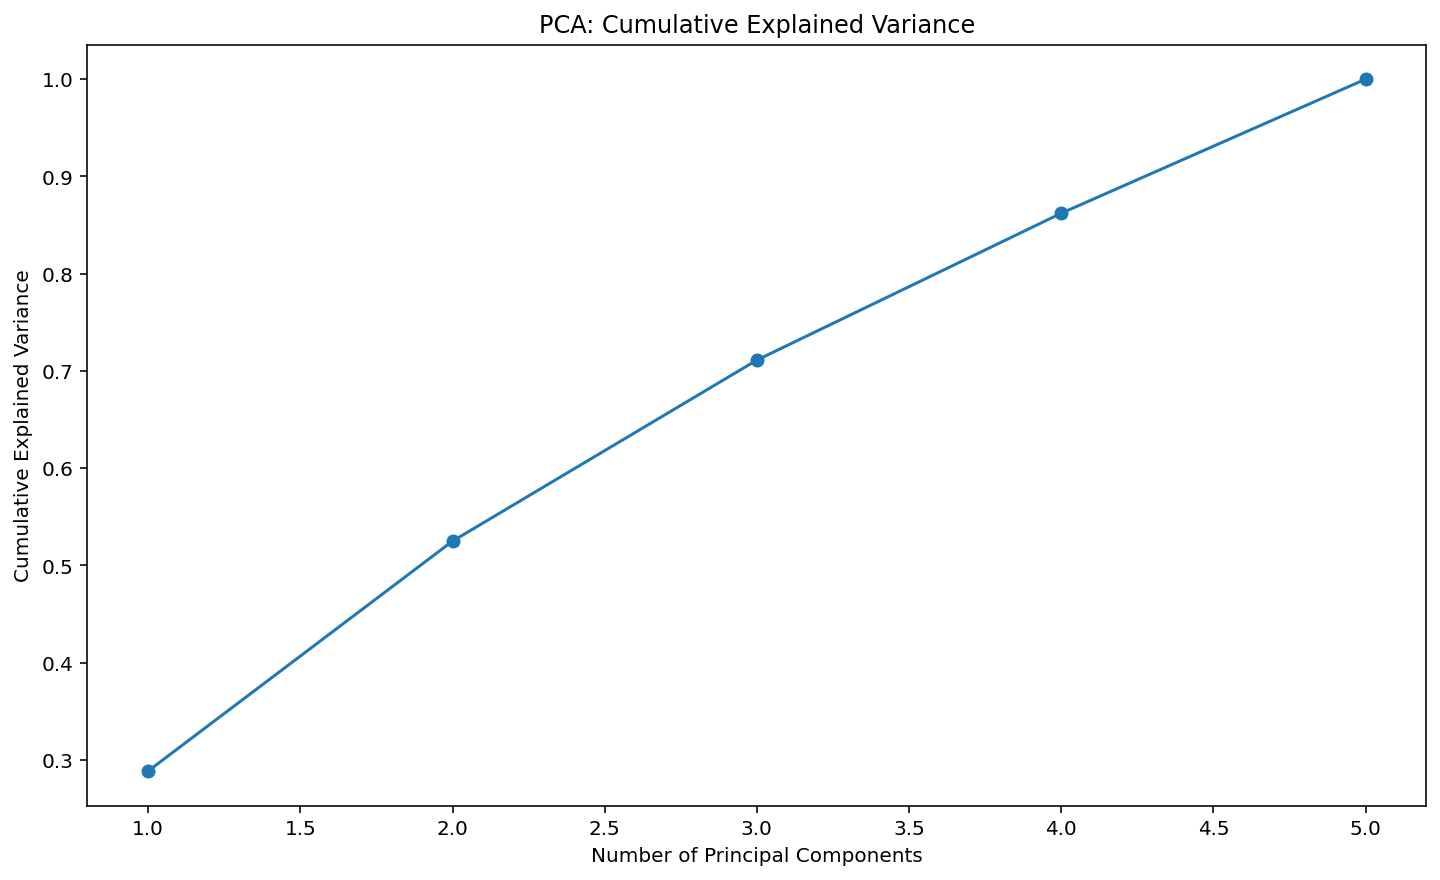

Number of components for 95% variance: 5


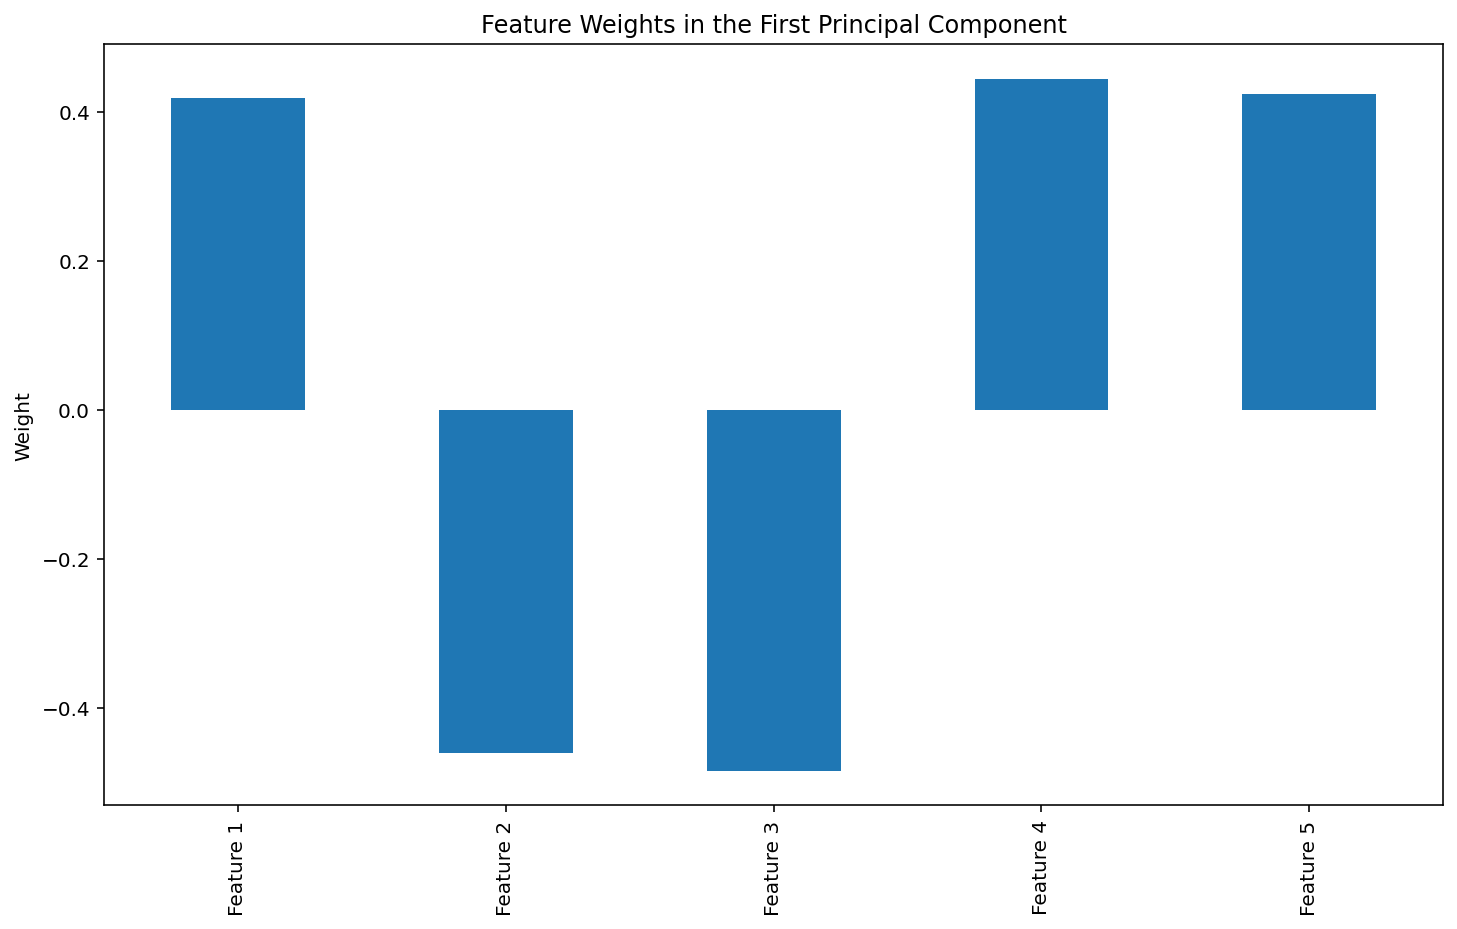

Correlation matrix of principal components:
              PC1           PC2           PC3           PC4           PC5
PC1  1.000000e+00 -8.659836e-16  4.607366e-16 -5.266853e-16 -6.218294e-16
PC2 -8.659836e-16  1.000000e+00 -2.844991e-16  1.163951e-16 -4.703696e-16
PC3  4.607366e-16 -2.844991e-16  1.000000e+00  6.463272e-16 -1.554076e-16
PC4 -5.266853e-16  1.163951e-16  6.463272e-16  1.000000e+00 -2.141449e-15
PC5 -6.218294e-16 -4.703696e-16 -1.554076e-16 -2.141449e-15  1.000000e+00
Reg no:111622201118


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)
data = np.random.rand(100, 5) 
mean_values = np.mean(data, axis=0)
covariance_matrix = np.cov((data - mean_values).T)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_explained_variance) + 1), 
cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Cumulative Explained Variance')
plt.show()
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f'Number of components for 95% variance: {n_components}')
projected_data = np.dot(data - mean_values, eigenvectors[:, :n_components])
feature_weights = pd.DataFrame(eigenvectors[:, 0], index=['Feature 1', 'Feature 2', 
'Feature 3', 'Feature 4', 'Feature 5'],
 columns=['Weight'])
feature_weights.plot(kind='bar', legend=None)
plt.title('Feature Weights in the First Principal Component')
plt.ylabel('Weight')
plt.show()
pca_df = pd.DataFrame(projected_data, columns=[f'PC{i+1}' for i in 
range(projected_data.shape[1])])
correlation_matrix = pca_df.corr()
print("Correlation matrix of principal components:")
print(correlation_matrix)
print("Reg no:111622201118")